In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
def convert_rgb_to_gray(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n),dtype='uint8')
    for i in range(m):
        for j in range(n):
            im_2[i,j]=get_instance(im_1[i,j,:])
    return im_2
def get_instance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1 + (b**2)*w2 + (c**2)*w3)**.5
    return d
def get_mask_for_edge():
    return np.array([-1,0,1,-2,0,2,-1,0,1]).reshape(3,3)
def apply_mask_for_edge(part_of_image):
    mask=get_mask_for_edge()
    return sum(sum(part_of_image*mask))
def get_edges(im_1):
    m,n = im_1.shape[0],im_1.shape[1]
    im_2 = np.zeros((m,n))
    for i in range(3,m-3):
        for j in range(3,n-3):
            poi=im_1[i-1:i+2,j-1:j+2]
            im_2[i,j]=apply_mask_for_edge(poi)
    return im_2

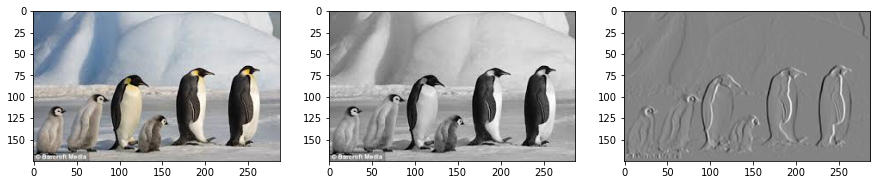

In [26]:
path=r"C:\\Users\\hakan\\Görüntü İşleme\\penguen.jpg"
img_orjinal=plt.imread(path)
img_graylevel=convert_rgb_to_gray(img_orjinal)
img_with_edges=get_edges(img_graylevel)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img_orjinal)
plt.subplot(1,3,2),plt.imshow(img_graylevel,cmap='gray')
plt.subplot(1,3,3),plt.imshow(img_with_edges,cmap='gray')
plt.show()